# Tutorial: detecting long-tail (rare) samples in a dataset

### Q: What are long-tail samples?

A figure below illustrates what are high-frequency features and long-tailed features. 

Long-tailed features appear to have a low-frequency in the data and tend to be under-fitted by the deep neural nets. Hence, bad performed.

/home/jiaheng/docta_opensource/docta


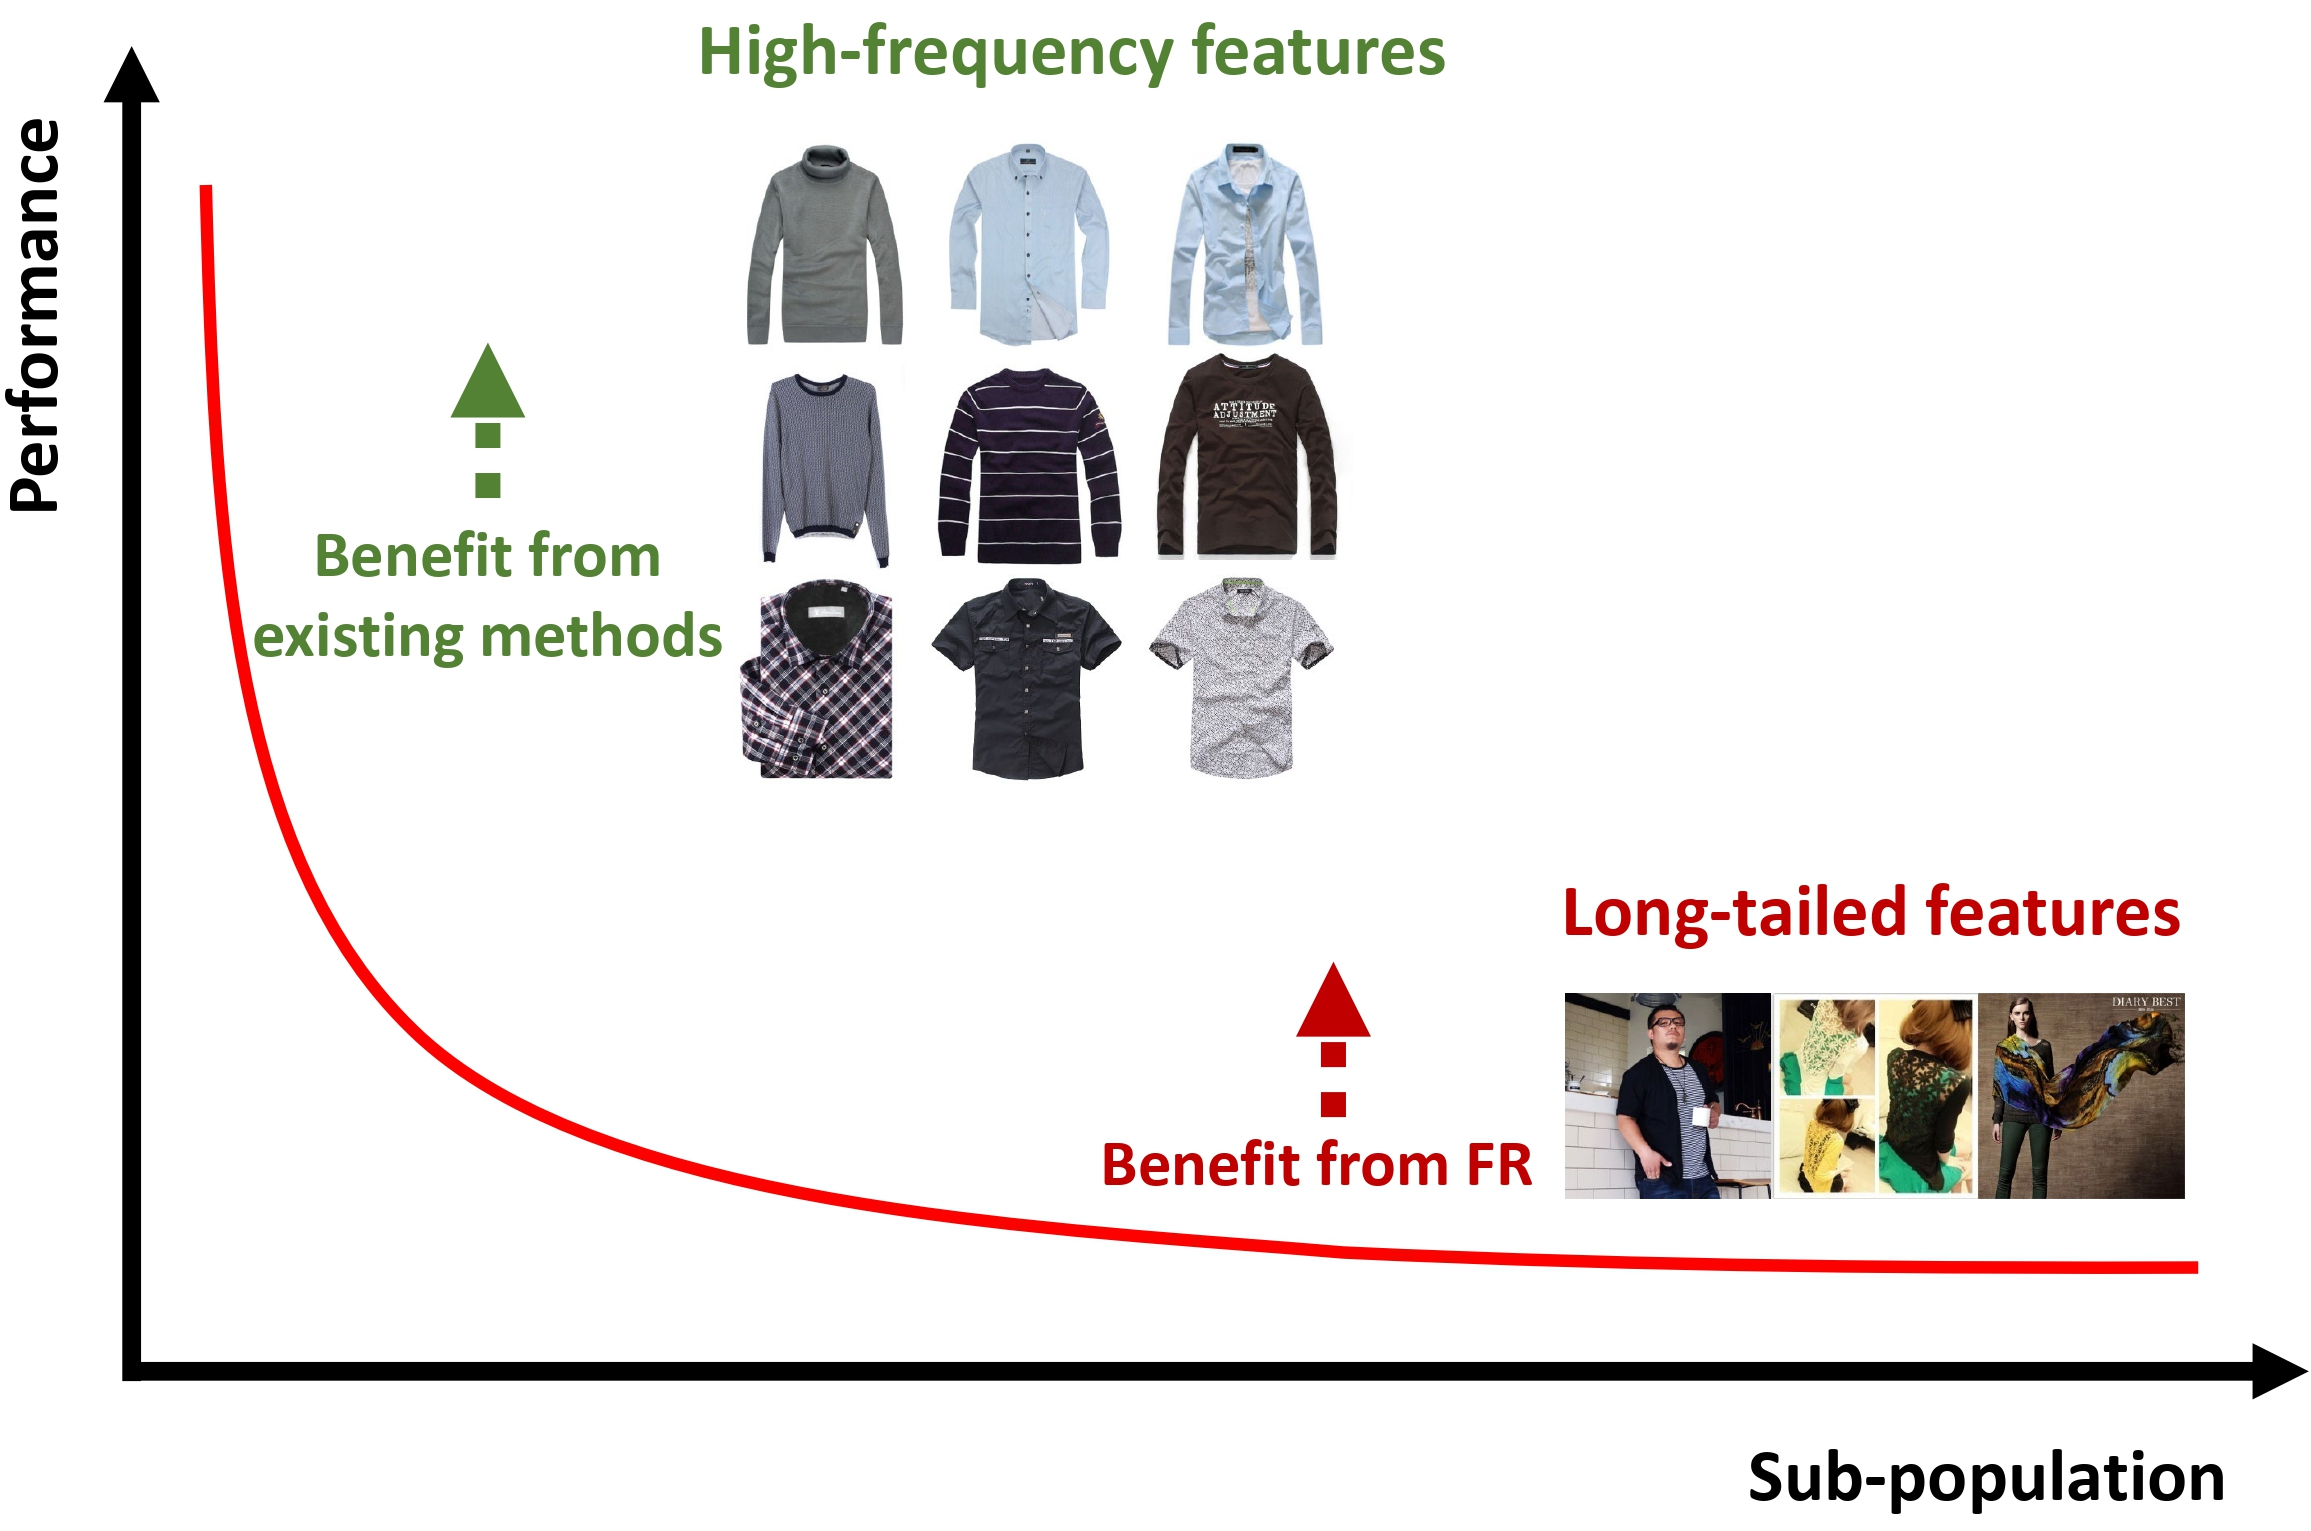

In [1]:
import sys
import os
os.chdir('..')
o_path = os.getcwd()
print(o_path)
sys.path.append(o_path) # set path so that modules from other foloders can be loaded
from IPython.display import Image
display(Image(filename='demo_imgs/long-tail-sample.jpg', width = 300, height = 160))

This tutorial introduces how Docta helps you finding long-tail rare samples in a dataset, with following three choices:

### Use embeddings to detect long-tail samples (clothes image)

**Basic intuition**: 

Consider the averaged distance between each sample and its $k$ nearest neighbors;

**Long-tail samples**: 

A sample with a larger distance by referring to its neighbors (embedding perspective) is likely to be a long-tail/rare sample.


**Pros**: 

* General: works for any data that could be extraced as embeddings! 

* Fast: get embeddings and produce long-tail scores fast!

* Insight: embeddings are key and poopular components for depicting data samples!

**Step 1** get long-tailed scores with pre-defined configs.

In [2]:
%run ./tools/docta_rare_pattern.py --feature_type 'embedding' --suffix 'c1m_subset'

==== Docta: Doctor for your data. Current version: 0.0 ====


10it [00:08,  1.15it/s]

Save 10 instances to ./results/Clothing1M_subset/embedded_Clothing1M_subset_0.pt
[0, 1]
idx range for training data [0]
#Samples (dataset-train) 1000.
Customizing the extracted embeddings as a dataset...
Getting consensus patterns...
Long-tail score saved to ./results/Clothing1M_subset/embedding.csv


**Step2** Take a look at the long-tail scores and samples

In [3]:
import pandas as pd
lt_score_embedd = pd.read_csv('./results/Clothing1M_subset/embedding.csv')
lt_score_embedd.head()

,idx,longtail_scores
0,0,0.2394
1,1,0.2042
2,2,0.0991
3,3,0.1009
4,4,0.0886


In [4]:
# A help function for visualization
# %matplotlib notebook
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def visualize_lt(idxs):
    plt.rcParams["figure.figsize"] = (10,8)
    size = len(idxs)
    width = int(size / 5)
    for i in range(size):
        ax = plt.subplot(width,5,i+1)
        idx = idxs[i]
        path = os.path.join(os.getcwd(), f'demo_imgs/c1m_subset/all/clothes{idx+1}.jpg')
        image = mpimg.imread(path)
        ax.imshow(image)
        ax.axis('off')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


### Take a look at our self-injected long-tail samples (25 imgaes among 1K images)

The `c1m_subset` image folder contains 1K images, while first 25 images are visualized below, which are viewed as long-tail images.

The remaining 975 images belong to one of the 14 classes, originated from [Clothing1M](https://github.com/Cysu/noisy_label) dataset:

T-shirt, Shirt, Knitwear, Chiffon, Sweater, Hoodie, Windbreaker, Jacket, DownCoat, Suit, Shawl, Dress, Vest, and Underwear.

**Reasons:** The 25 long-tail images are rare patterns since they belong to one of the following categories:

* `Out-of-distribution data`: shoes, bags, gloves, makeups, sunglasses, belts, watches, etc, which falls outside of the above 14 classes.

* `In-distribution data with rare patterns`: such rare patterns include synthetic images, fashion-mnist images, cartoon style, etc. 

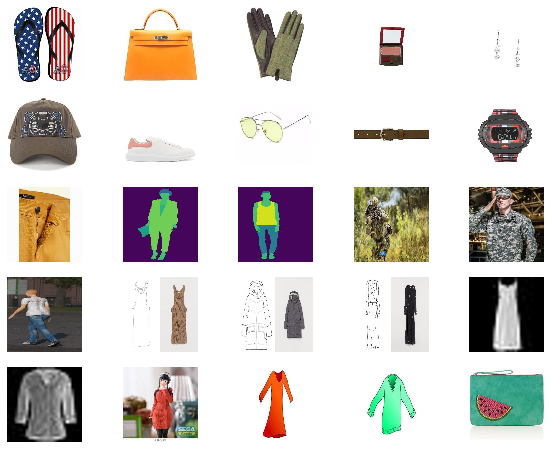

In [5]:
visualize_lt(idxs=range(25))

### Take a look at other random samples (most likely to be head samples)

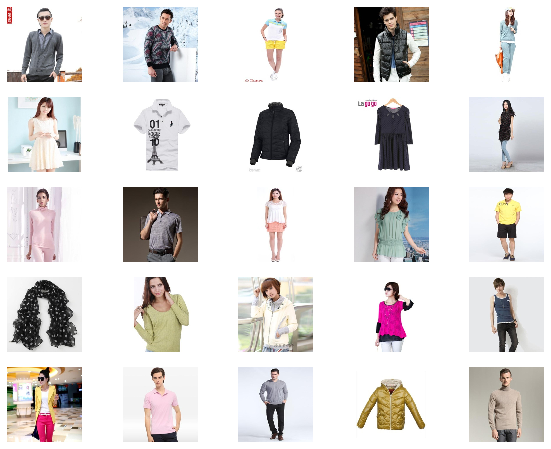

In [6]:
visualize_lt(idxs=range(25, 50))

### Visualization of top-5 long-tail images (among 1K)

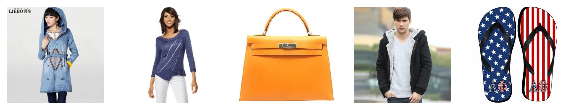

In [7]:

num_show = 5 # show 5 pics
lt_score = lt_score_embedd['longtail_scores'].tolist()
topN = sorted(range(len(lt_score)), key = lambda sub: lt_score[sub])[-num_show:]
visualize_lt(idxs=topN)

**Empirical observation:**

When more clothing1m test images are added to the subset (around 10K), the self-injected 25 long-tail samples are much morely easily detected.

In [8]:
print(f"Indexes of {len(topN)} samples with highest long-tail scores are {topN}")

Indexes of 5 samples with highest long-tail scores are [381, 246, 1, 637, 0]


### Visualization of head images (top 5 among 1K)

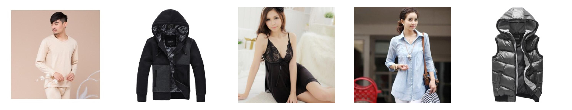

In [9]:
lastN = sorted(range(len(lt_score)), key = lambda sub: lt_score[sub])[:num_show]
visualize_lt(idxs=lastN)

In [10]:
print(f"Indexes of {len(lastN)} samples with lowest long-tail scores are {lastN}")

Indexes of 5 samples with lowest long-tail scores are [357, 205, 248, 724, 444]


### The distribution of the per-sample long-tail scores 

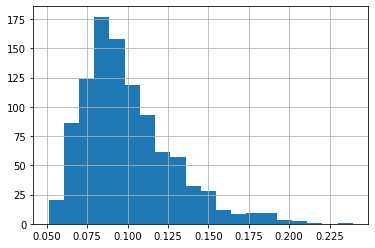

In [11]:
lt_score_embedd['longtail_scores'].hist(bins=20, figsize=[6,4])